In [13]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [27]:
# Exploratory Data Analysis
df = pd.read_csv('D:\\SensViz\\Machine Learning Task 1\\train.csv')
print(df.shape)
print(df.describe())
print(df.head())
print(df.dtypes)
missing_values = df.isnull().sum()
print(missing_values)

(891, 12)
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
   PassengerId  Survived  Pclass  \
0            1         0       3   

In [14]:
# Count the number of samples in each class
class_counts = df['Survived'].value_counts()
# Calculate the proportion of each class
class_proportions = class_counts / len(df)
# Print the class proportions
print(class_proportions)

0    0.616162
1    0.383838
Name: Survived, dtype: float64


In [29]:
# Adjust the missing values
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)
df['Cabin'] = df['Cabin'].fillna('')
df['Embarked'] = df['Embarked'].fillna('')
missing_values = df.isnull().sum()
print(missing_values)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


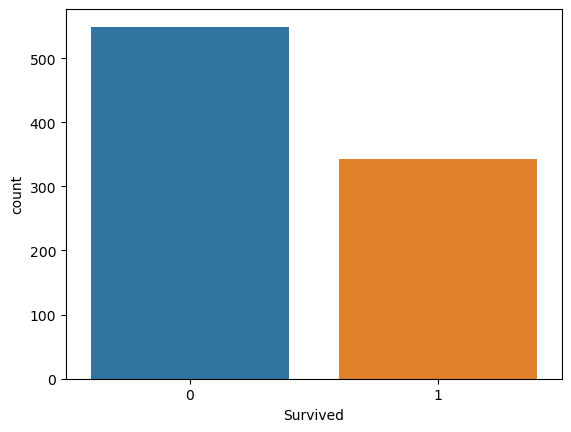

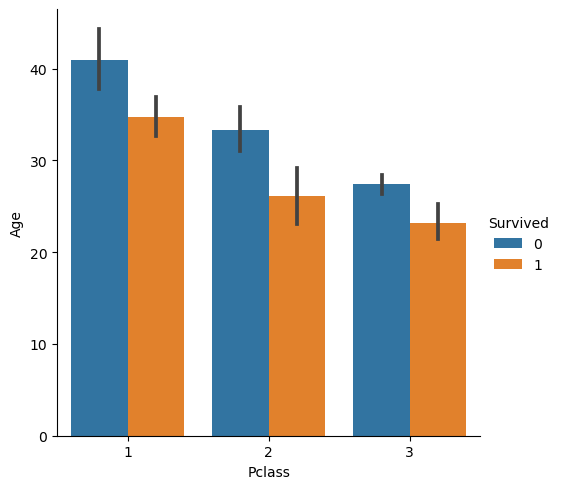

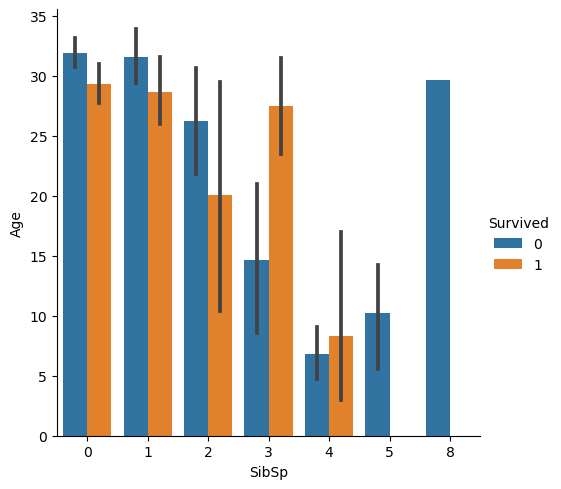

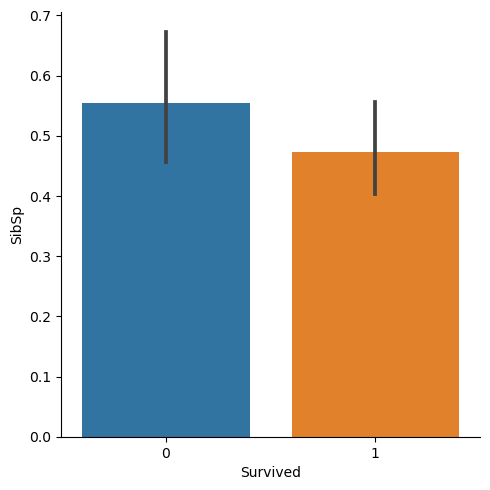

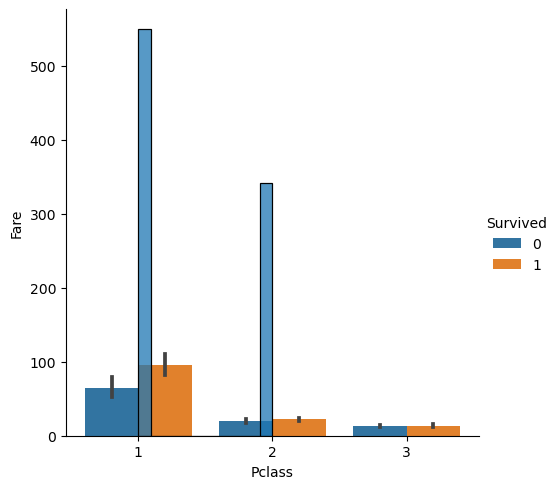

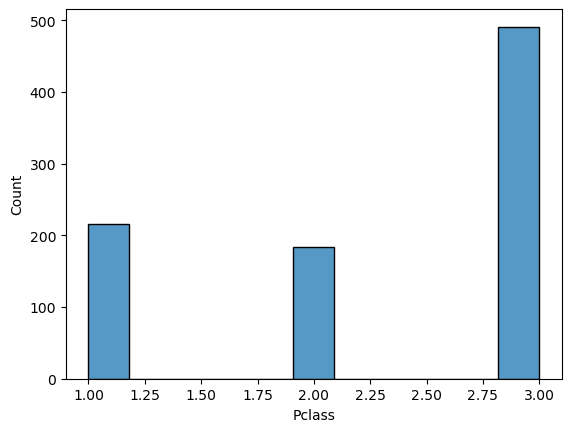

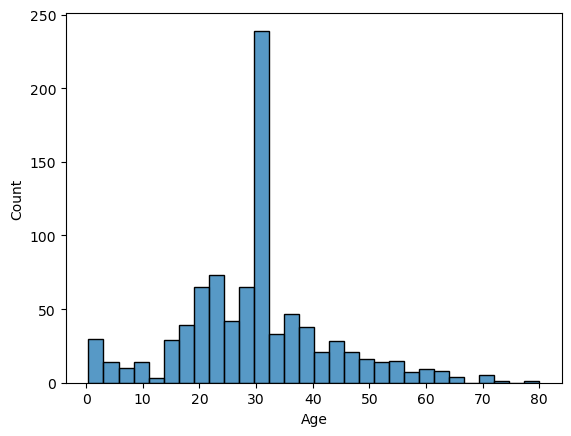

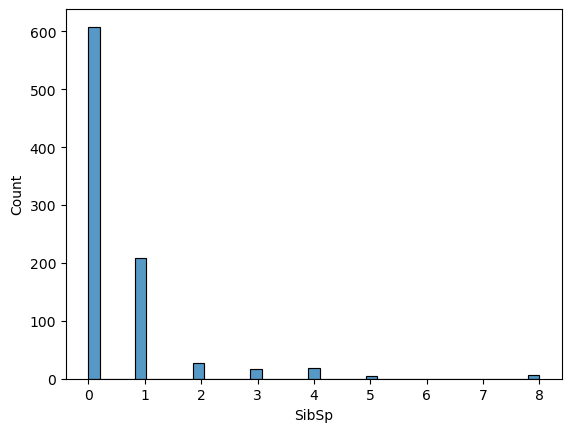

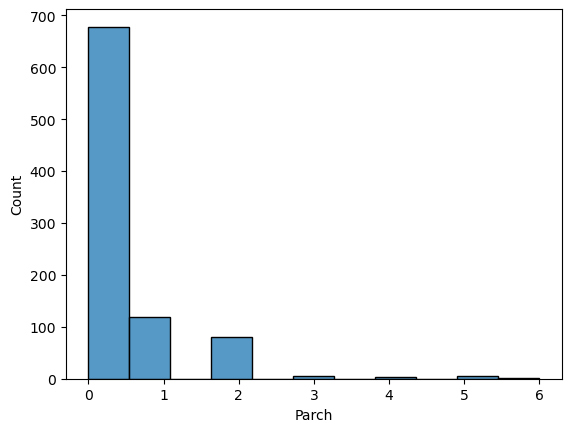

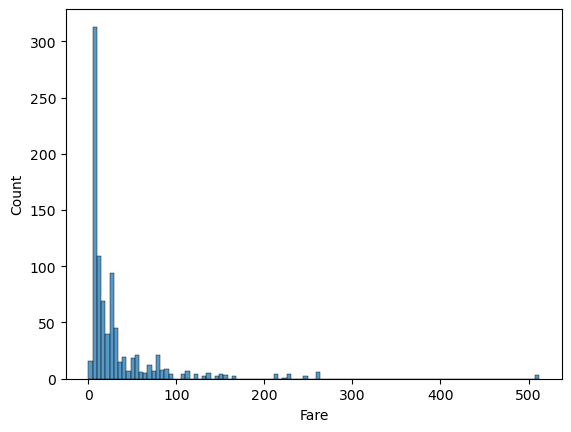

In [15]:
#Graphs 
sns.countplot(x='Survived', data=df)
sns.catplot(x='Pclass', y='Age', hue='Survived',kind='bar', data=df)
sns.catplot(x='SibSp', y='Age', hue='Survived',kind='bar', data=df)
sns.catplot(x='Survived', y='SibSp', kind='bar', data=df)
sns.catplot(x='Pclass', y='Fare', hue='Survived', kind='bar', data=df)
for col in ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    sns.histplot(data=df, x=col)
    plt.show()

In [16]:
# Converts all categorical columns in a DataFrame to numeric values
def convert_categorical_to_numeric(df):
    le = LabelEncoder()
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = le.fit_transform(df[col])
    return df

df = convert_categorical_to_numeric(df)
print(df.head())

   PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0            1         0       3   108    1  22.0      1      0     523   
1            2         1       1   190    0  38.0      1      0     596   
2            3         1       3   353    0  26.0      0      0     669   
3            4         1       1   272    0  35.0      1      0      49   
4            5         0       3    15    1  35.0      0      0     472   

      Fare  Cabin  Embarked  
0   7.2500      0         3  
1  71.2833     82         1  
2   7.9250      0         3  
3  53.1000     56         3  
4   8.0500      0         3  


In [17]:
# Separating the values and labels
X = df.drop(columns=['Survived', 'Name'])
Y = df['Survived']

# Splitting the data into train and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2) 

In [18]:
#applying the logistic regression model
model_LR = LogisticRegression(max_iter=10000)
model_LR.fit(x_train, y_train)

# Evaluation accuracy score
x_train_predictions_LR = model_LR.predict(x_train)
training_data_accuracy_LR = accuracy_score(x_train_predictions_LR, y_train)
print('Training data accuracy using Linear Regression:', training_data_accuracy_LR)

# accuracy for the test data
x_test_predictions_LR = model_LR.predict(x_test)
testing_data_accuracy_LR = accuracy_score(x_test_predictions_LR, y_test)
print('Testing data accuracy Using Linear Regression:', testing_data_accuracy_LR)

Training data accuracy using Linear Regression: 0.8002496878901373
Testing data accuracy Using Linear Regression: 0.8333333333333334


In [19]:
model_SVM = SVC(kernel='linear')
model_SVM.fit(x_train, y_train)

# Evaluate SVM model accuracy
x_train_predictions_SVM = model_SVM.predict(x_train)
training_data_accuracy_SVM = accuracy_score(x_train_predictions_SVM, y_train)
print('Training data accuracy using SVM:', training_data_accuracy_SVM)

x_test_predictions_SVM = model_SVM.predict(x_test)
testing_data_accuracy_SVM = accuracy_score(x_test_predictions_SVM, y_test)
print('Testing data accuracy using SVM:', testing_data_accuracy_SVM)

Training data accuracy using SVM: 0.7902621722846442
Testing data accuracy using SVM: 0.8333333333333334


In [20]:
#Now we import the test data and do preprocessing
test_dataset = pd.read_csv('D:\\SensViz\\Machine Learning Task 1\\test.csv')
test_dataset.describe()
missing_values = test_dataset.isnull().sum()
print(missing_values)
mean_age= test_dataset['Age'].mean()
test_dataset['Age'] = test_dataset['Age'].fillna(mean_age)
test_dataset['Cabin'] = test_dataset['Cabin'].fillna('')
missing_values = test_dataset.isnull().sum()
mean_Fare= test_dataset['Fare'].mean()
test_dataset['Fare'] = test_dataset['Fare'].fillna(mean_Fare)
print(missing_values)

# convert testing data set into the numeric form
test_dataset = convert_categorical_to_numeric(test_dataset)

#predictions on new  data
# Extract the features from the new dataset
X_new = test_dataset.drop(['Name'], axis=1)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64


In [21]:
# Test the model on the new dataset
y_pred_LR = model_LR.predict(X_new)

# Print the predicted target values
print(y_pred_LR)

y_test = pd.read_csv('D:\\SensViz\\Machine Learning Task 1\\gender_submission.csv')['Survived']
testing_data_accuracy_LR = accuracy_score(y_pred_LR, y_test)
print('Testing data accuracy for new data:', testing_data_accuracy_LR)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0
 1 1 1 1 1 1 0 1 0 0 0]
Testing data accuracy for new data: 0.9090909090909091


In [22]:
y_pred_svm= model_SVM.predict(X_new)
print(y_pred_svm)
testing_data_accuracy_svm = accuracy_score(y_pred_svm, y_test)
print('Testing data accuracy for new data:', testing_data_accuracy_svm)


[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
Testing data accuracy for new data: 0.9880382775119617
